In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [52]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Data Science Job Salaries Dataset contains 11 columns, each are:
1. work_year: The year the salary was paid.
2. experience_level: The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
3. employment_type:The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
4. salary: The total gross salary amount paid.
5. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
6. salaryinusd:The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
7. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
8. remote_ratio: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
9. company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
10. company_size: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [3]:
print(df.shape)


(607, 12)


In [4]:
print(df.info)

<bound method DataFrame.info of      Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD        

In [5]:
print(df.columns)



Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


In [6]:
print(df.describe)

<bound method NDFrame.describe of      Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD      

In [7]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [8]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [10]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [11]:
df['experience_level'] = df['experience_level'].replace({ 'EN':'Entry-level','MI':'Junior Mid-level','SE':'Intermediate Senior-level','EX':'Expert Executive-level/Director'})

df['employment_type'] = df['employment_type'].replace({'PT':'Part-time','FT':'Full-time','CT':'Contract' ,'FL':'Freelance'})

df['remote_ratio'] = df['remote_ratio'].replace({0:'No remote work', 50:'Partially remote', 100:'Fully remote'})

#df['company_size']= df['company_size'].replace({'S':less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)})

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Junior Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,No remote work,DE,L
1,2020,Intermediate Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,No remote work,JP,S
2,2020,Intermediate Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,Partially remote,GB,M
3,2020,Junior Mid-level,Full-time,Product Data Analyst,20000,USD,20000,HN,No remote work,HN,S
4,2020,Intermediate Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,Partially remote,US,L


In [12]:
print(df['employee_residence'].unique())
print(df['company_location'].unique())

['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'PL' 'PT' 'CN' 'GR'
 'AE' 'NL' 'MX' 'CA' 'AT' 'NG' 'PH' 'ES' 'DK' 'RU' 'IT' 'HR' 'BG' 'SG'
 'BR' 'IQ' 'VN' 'BE' 'UA' 'MT' 'CL' 'RO' 'IR' 'CO' 'MD' 'KE' 'SI' 'HK'
 'TR' 'RS' 'PR' 'LU' 'JE' 'CZ' 'AR' 'DZ' 'TN' 'MY' 'EE' 'AU' 'BO' 'IE'
 'CH']
['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'CN' 'GR' 'AE' 'NL'
 'MX' 'CA' 'AT' 'NG' 'ES' 'PT' 'DK' 'IT' 'HR' 'LU' 'PL' 'SG' 'RO' 'IQ'
 'BR' 'BE' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'CO' 'MD' 'KE' 'SI' 'CH' 'VN'
 'AS' 'TR' 'CZ' 'DZ' 'EE' 'MY' 'AU' 'IE']


In [13]:
df.corr()

,work_year,salary,salary_in_usd
work_year,1.000000,-0.087577,0.170493
salary,-0.087577,1.000000,-0.083906
salary_in_usd,0.170493,-0.083906,1.000000


In [14]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [15]:
categorical_data = ['experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

numerical_data = ['remote_ratio','salary_in_usd']


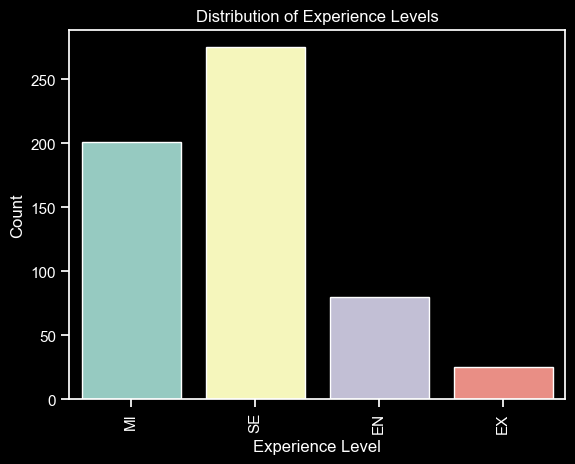

In [73]:
sns.countplot(data=df, x='experience_level')
plt.style.use('dark_background')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Distribution of Experience Levels')
plt.xticks(rotation=90)
plt.show()

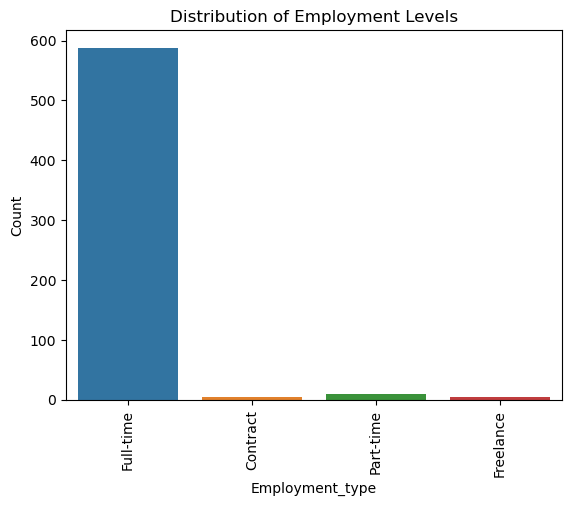

In [17]:
sns.countplot(data=df, x='employment_type')
plt.xlabel('Employment_type')
plt.ylabel('Count')
plt.title('Distribution of Employment Levels')
plt.xticks(rotation=90)
plt.show()

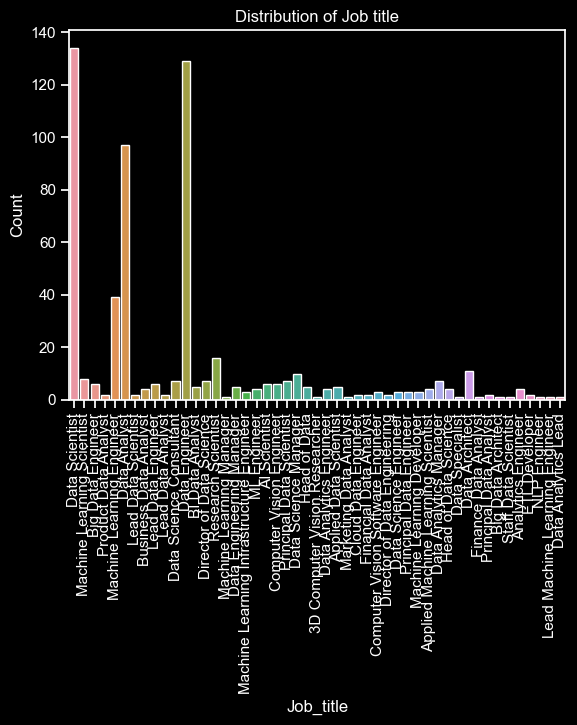

In [74]:
sns.countplot(data=df, x='job_title')
plt.style.use('dark_background')
plt.xlabel('Job_title')
plt.ylabel('Count')
plt.title('Distribution of Job title')
plt.xticks(rotation=90)
plt.show()

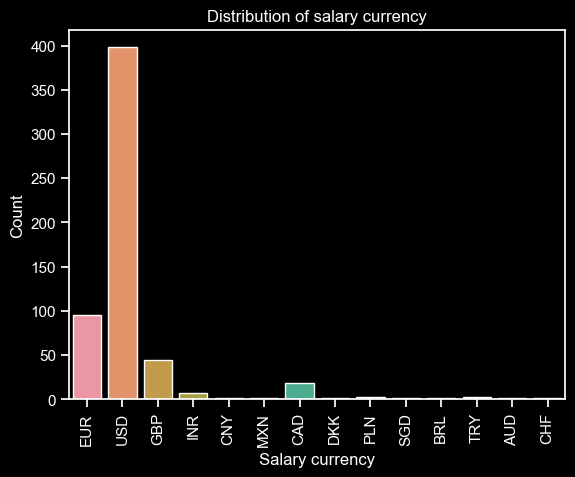

In [75]:
sns.countplot(data=df, x='salary_currency')
plt.style.use('dark_background')
plt.xlabel('Salary currency')
plt.ylabel('Count')
plt.title('Distribution of salary currency')
plt.xticks(rotation=90)
plt.show()

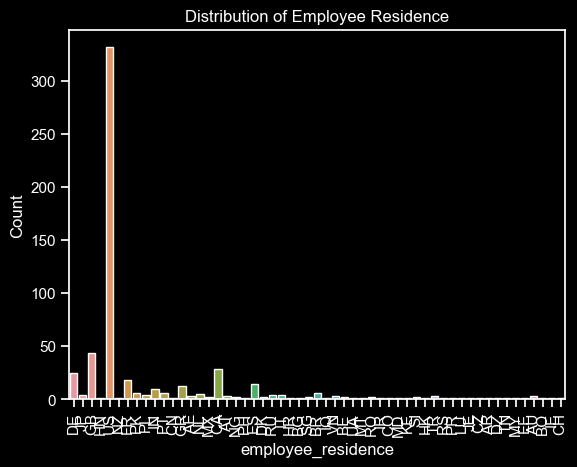

In [76]:
sns.countplot(data=df, x='employee_residence')
plt.style.use('dark_background')
plt.xlabel('employee_residence')
plt.ylabel('Count')
plt.title('Distribution of Employee Residence')
plt.xticks(rotation=90)
plt.show()

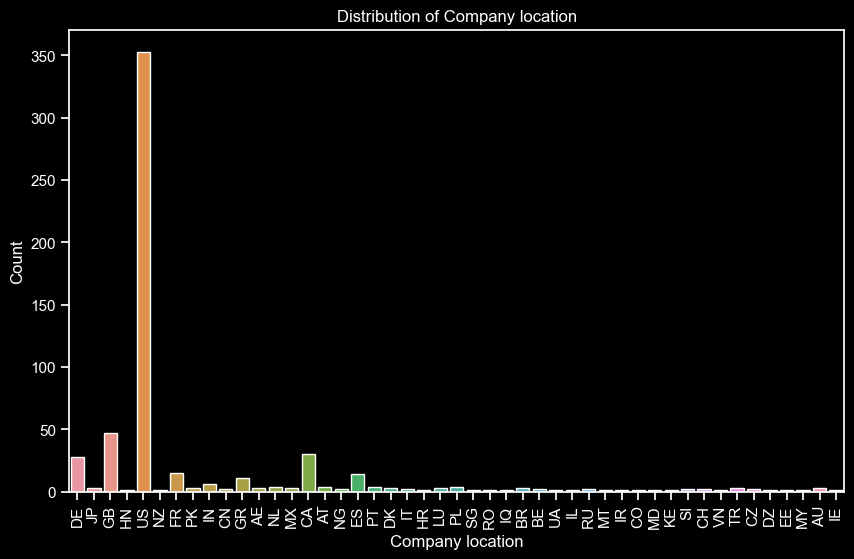

In [72]:
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
sns.countplot(data=df, x='company_location')
plt.xlabel('Company location')
plt.ylabel('Count')
plt.title('Distribution of Company location')
plt.xticks(rotation=90)
plt.show()

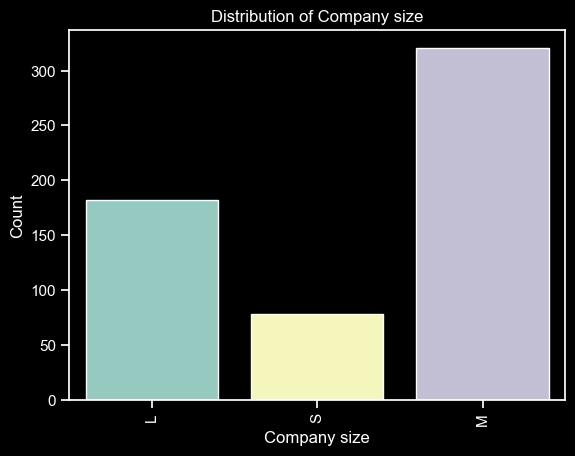

In [71]:
sns.countplot(data=df, x='company_size')
plt.style.use('dark_background')
plt.xlabel('Company size')
plt.ylabel('Count')
plt.title('Distribution of Company size')
plt.xticks(rotation=90)
plt.show()

In [23]:
categorical_data = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

numerical_data = ['remote_ratio','salary_in_usd','salary']


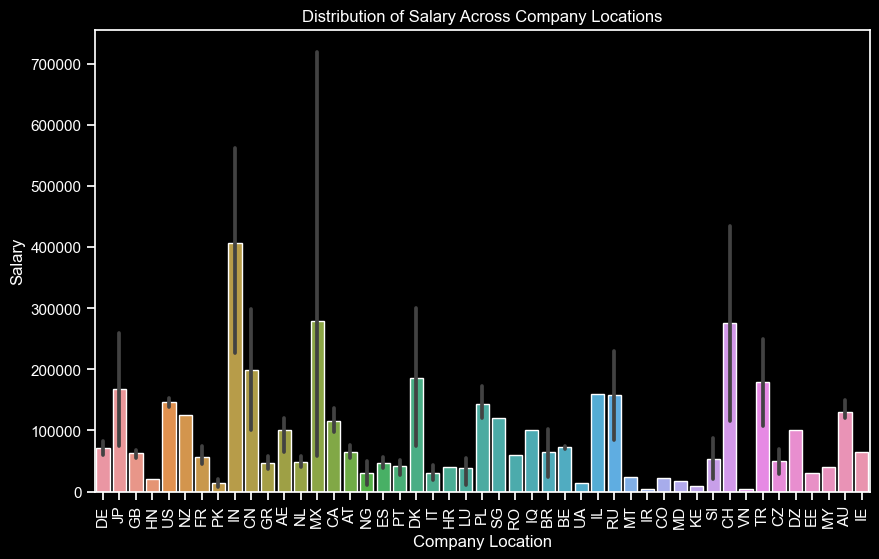

In [70]:
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
sns.barplot(data=df, x='company_location', y='salary')
plt.xlabel('Company Location')
plt.ylabel('Salary')
plt.title('Distribution of Salary Across Company Locations')
plt.xticks(rotation=90)
plt.show()

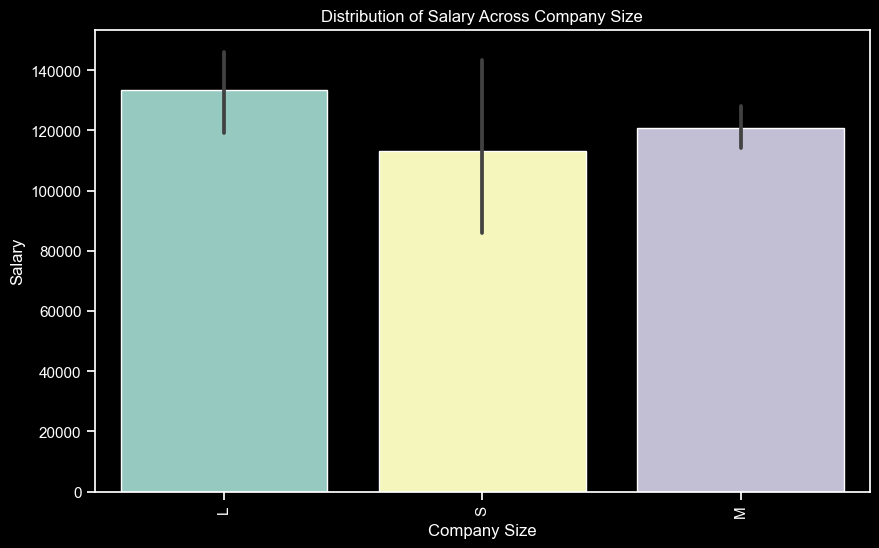

In [69]:
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
sns.barplot(data=df, x='company_size', y='salary')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.title('Distribution of Salary Across Company Size')
plt.xticks(rotation=90)
plt.show()

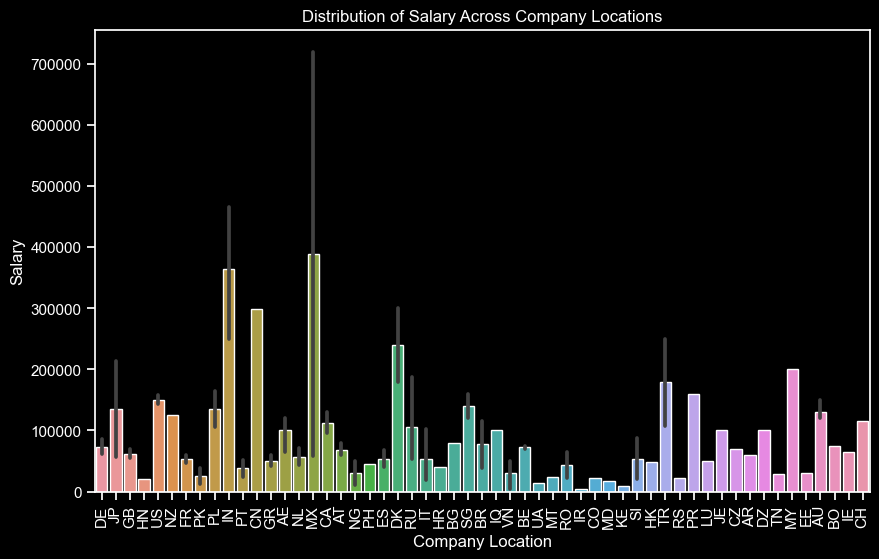

In [77]:
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
sns.barplot(data=df, x='employee_residence', y='salary')
plt.xlabel('Company Location')
plt.ylabel('Salary')
plt.title('Distribution of Salary Across Company Locations')
plt.xticks(rotation=90)
plt.show()

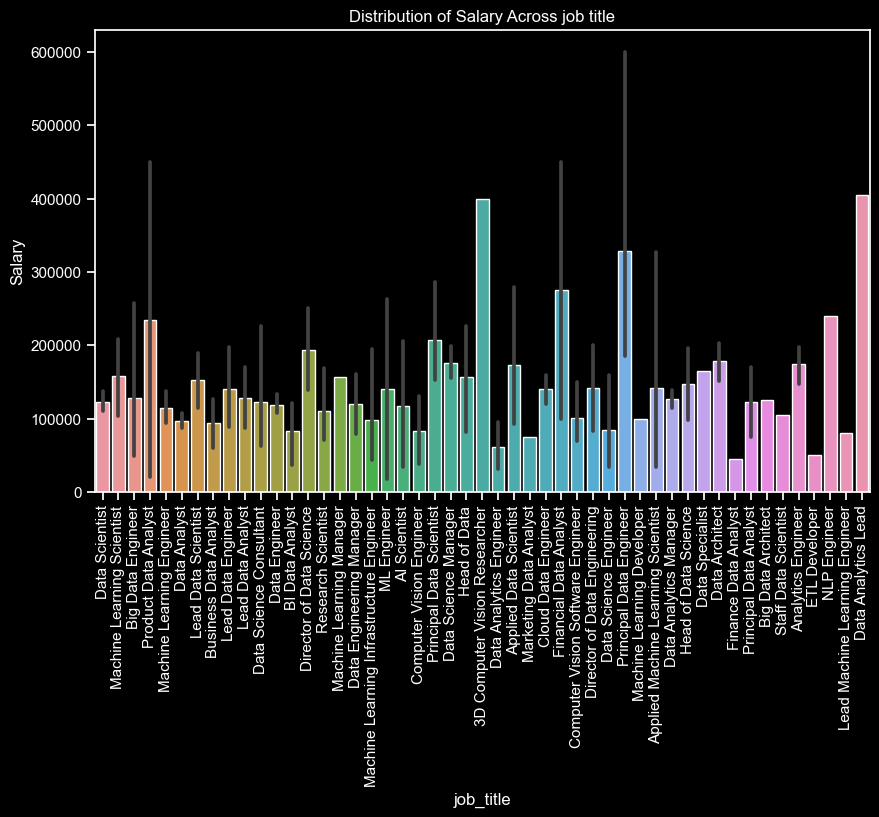

In [78]:
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
sns.barplot(data=df, x='job_title', y='salary')
plt.xlabel('job_title')
plt.ylabel('Salary')
plt.title('Distribution of Salary Across job title')
plt.xticks(rotation=90)
plt.show()

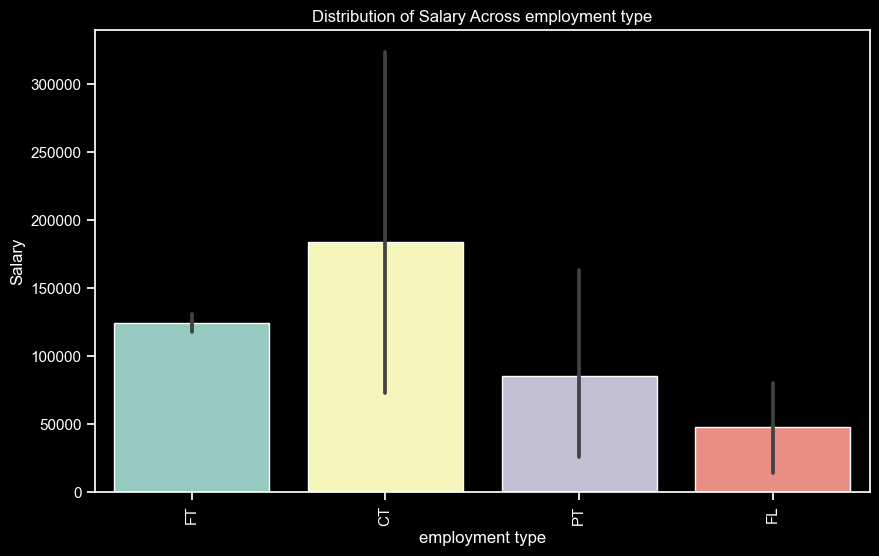

In [68]:
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
sns.barplot(data=df, x='employment_type', y='salary')
plt.xlabel('employment type')
plt.ylabel('Salary')
plt.title('Distribution of Salary Across employment type')
plt.xticks(rotation=90)
plt.show()

In [29]:
#grouped_agg = grouped.agg({'salary': 'sum', '': 'count'})
df.groupby('job_title').nunique()

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
job_title,,,,,,,,,,
3D Computer Vision Researcher,1,1,1,1,1,1,1,1,1,1
AI Scientist,3,3,2,6,3,6,6,3,4,3
Analytics Engineer,1,2,1,4,1,4,1,2,1,1
Applied Data Scientist,2,3,1,5,3,5,2,3,3,1
Applied Machine Learning Scientist,2,2,2,4,2,4,4,2,2,2
BI Data Analyst,2,3,1,6,2,6,4,3,2,3
Big Data Architect,1,1,1,1,1,1,1,1,1,1
Big Data Engineer,2,3,1,8,4,8,6,3,6,3
Business Data Analyst,3,2,2,5,4,5,4,2,4,2


In [30]:
grouped = df.groupby('work_year')
grouped

In [31]:
emp_sal = df.groupby('employment_type')['salary'].max()
emp_sal

employment_type
Contract       416000
Freelance      100000
Full-time    30400000
Part-time      400000
Name: salary, dtype: int64

In [32]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [33]:
threshold = 11000000

df = df[df['salary'] <= threshold]

df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Junior Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,No remote work,DE,L
1,2020,Intermediate Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,No remote work,JP,S
2,2020,Intermediate Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,Partially remote,GB,M
3,2020,Junior Mid-level,Full-time,Product Data Analyst,20000,USD,20000,HN,No remote work,HN,S
4,2020,Intermediate Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,Partially remote,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Intermediate Senior-level,Full-time,Data Engineer,154000,USD,154000,US,Fully remote,US,M
603,2022,Intermediate Senior-level,Full-time,Data Engineer,126000,USD,126000,US,Fully remote,US,M
604,2022,Intermediate Senior-level,Full-time,Data Analyst,129000,USD,129000,US,No remote work,US,M
605,2022,Intermediate Senior-level,Full-time,Data Analyst,150000,USD,150000,US,Fully remote,US,M


In [34]:
exp_sal = df.groupby('experience_level')['salary'].max()
exp_sal

experience_level
Entry-level                         4450000
Expert Executive-level/Director     6000000
Intermediate Senior-level           7000000
Junior Mid-level                   11000000
Name: salary, dtype: int64

In [35]:
job_sal = df.groupby('job_title')['salary'].max()
job_sal

job_title
3D Computer Vision Researcher                 400000
AI Scientist                                 1335000
Analytics Engineer                            205300
Applied Data Scientist                        380000
Applied Machine Learning Scientist            423000
BI Data Analyst                             11000000
Big Data Architect                            125000
Big Data Engineer                            1672000
Business Data Analyst                        1400000
Cloud Data Engineer                           160000
Computer Vision Engineer                      180000
Computer Vision Software Engineer             150000
Data Analyst                                  450000
Data Analytics Engineer                       110000
Data Analytics Lead                           405000
Data Analytics Manager                        150260
Data Architect                                266400
Data Engineer                                4450000
Data Engineering Manager            

In [36]:
resi_sal = df.groupby('employee_residence')['salary'].max()
resi_sal

employee_residence
AE      120000
AR       60000
AT       80000
AU      150000
BE       75000
BG       80000
BO       75000
BR      160000
CA      250000
CH      115000
CN      299000
CO       21844
CZ       69999
DE      148000
DK      300000
DZ      100000
EE       30000
ES      130800
FR       85000
GB      140000
GR       80000
HK       48000
HN       20000
HR       40000
HU    11000000
IE       65000
IN     7000000
IQ      100000
IR        4000
IT      130000
JE      100000
JP     8500000
KE        9272
LU       50000
MD       18000
MT       24000
MX      720000
MY      200000
NG       50000
NL       85000
NZ      125000
PH       45760
PK       52800
PL      180000
PR      160000
PT       56000
RO       65000
RS       21600
RU      230000
SG      160000
SI       87000
TN       29000
TR      250000
UA       13400
US      600000
VN       50000
Name: salary, dtype: int64

In [37]:
loca_sal = df.groupby('company_location')['salary'].max()
loca_sal

company_location
AE      120000
AS     1335000
AT       80000
AU      150000
BE       75000
BR      102000
CA      250000
CH      435000
CN      299000
CO       21844
CZ       69999
DE      148000
DK      300000
DZ      100000
EE       30000
ES       80000
FR      152000
GB      140000
GR       80000
HN       20000
HR       40000
HU    11000000
IE       65000
IL      160000
IN     7000000
IQ      100000
IR        4000
IT       43200
JP     8500000
KE        9272
LU       55000
MD       18000
MT       24000
MX      720000
MY       40000
NG       50000
NL       59000
NZ      125000
PK       20000
PL      180000
PT       53000
RO       60000
RU      230000
SG      120000
SI       87000
TR      250000
UA       13400
US    11000000
VN        4000
Name: salary, dtype: int64

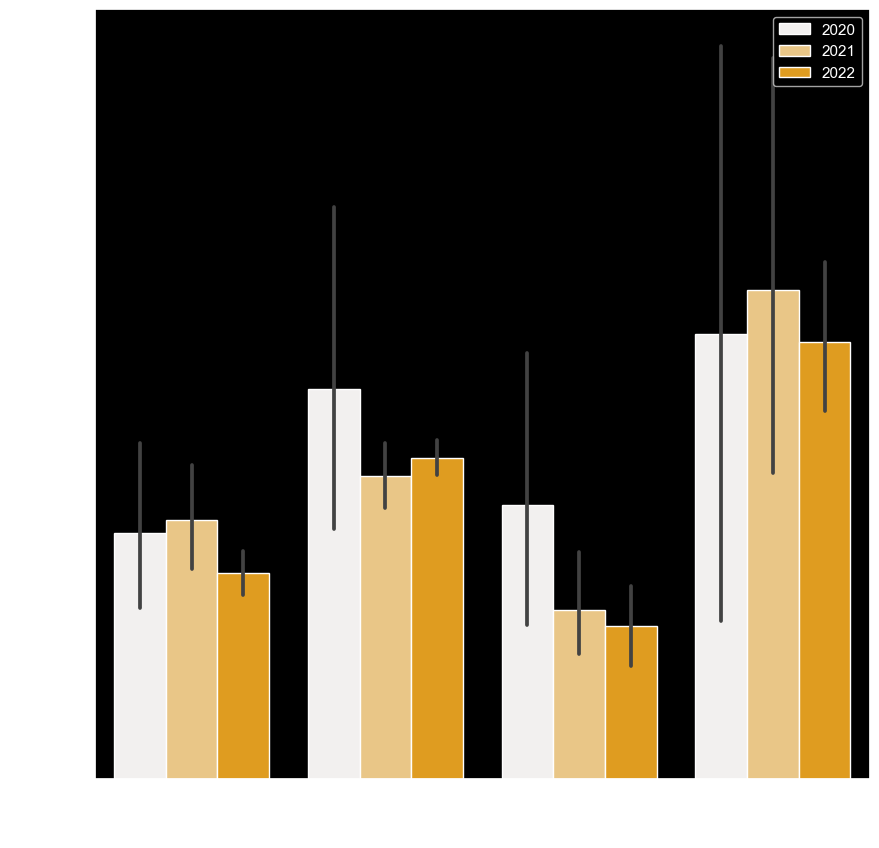

In [67]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
sns.barplot(data=df, x='experience_level', y="salary",hue='work_year',color='orange')
plt.xticks(rotation=45)
plt.legend()
plt.show()

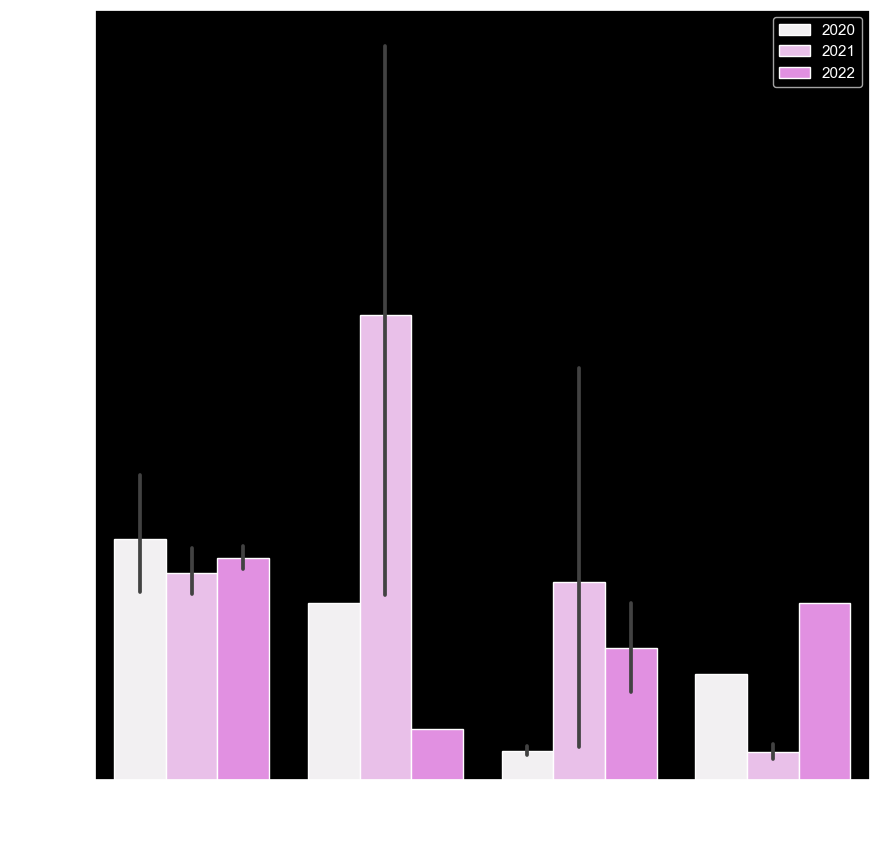

In [66]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
sns.barplot(data=df, x='employment_type', y="salary",hue='work_year',color='violet')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [40]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

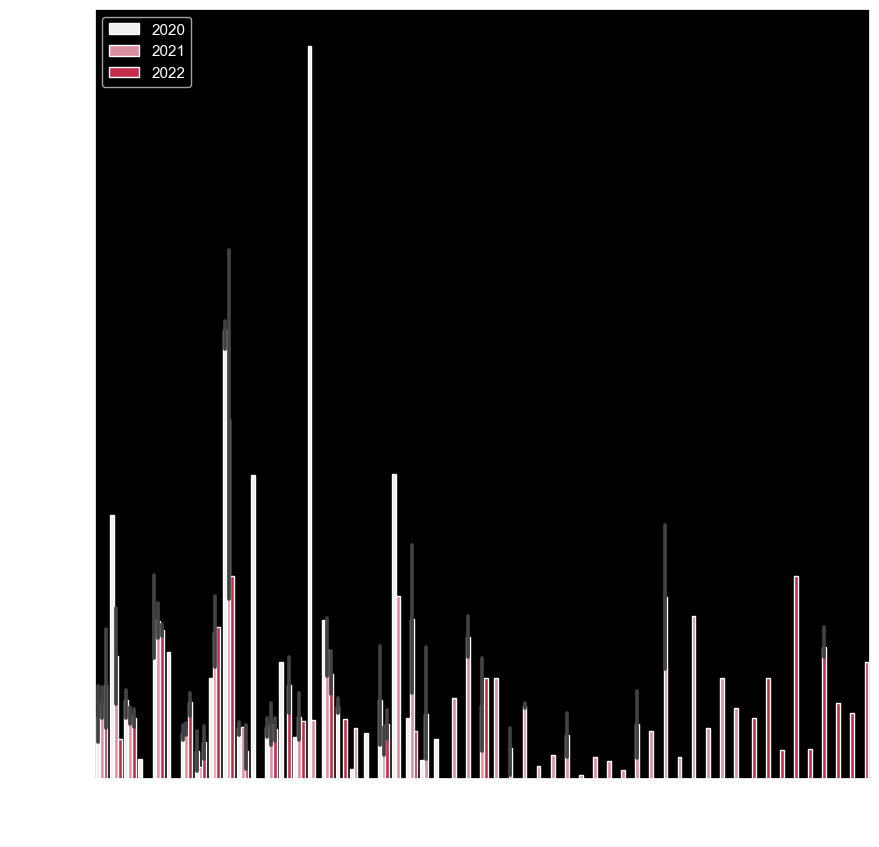

In [79]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
sns.barplot(data=df, x='employee_residence', y="salary",hue='work_year',color='crimson')
plt.xticks(rotation=90)
plt.legend()
plt.show()

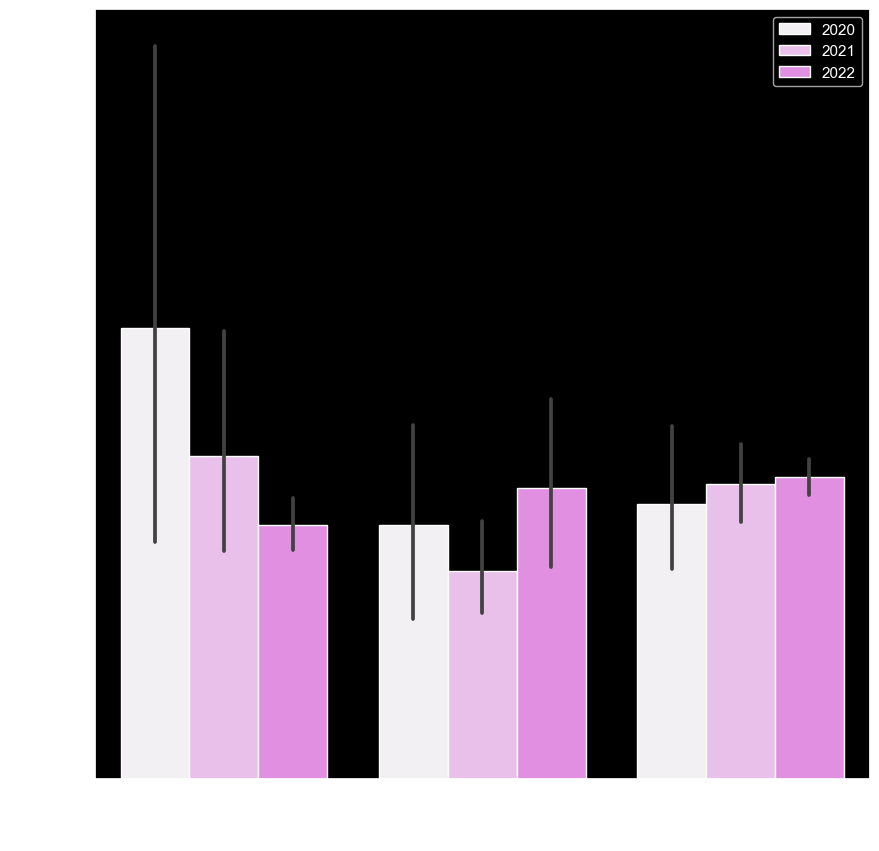

In [65]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
sns.barplot(data=df, x='remote_ratio', y="salary",hue='work_year',color='violet')
plt.xticks(rotation=45)
plt.legend()
plt.show()

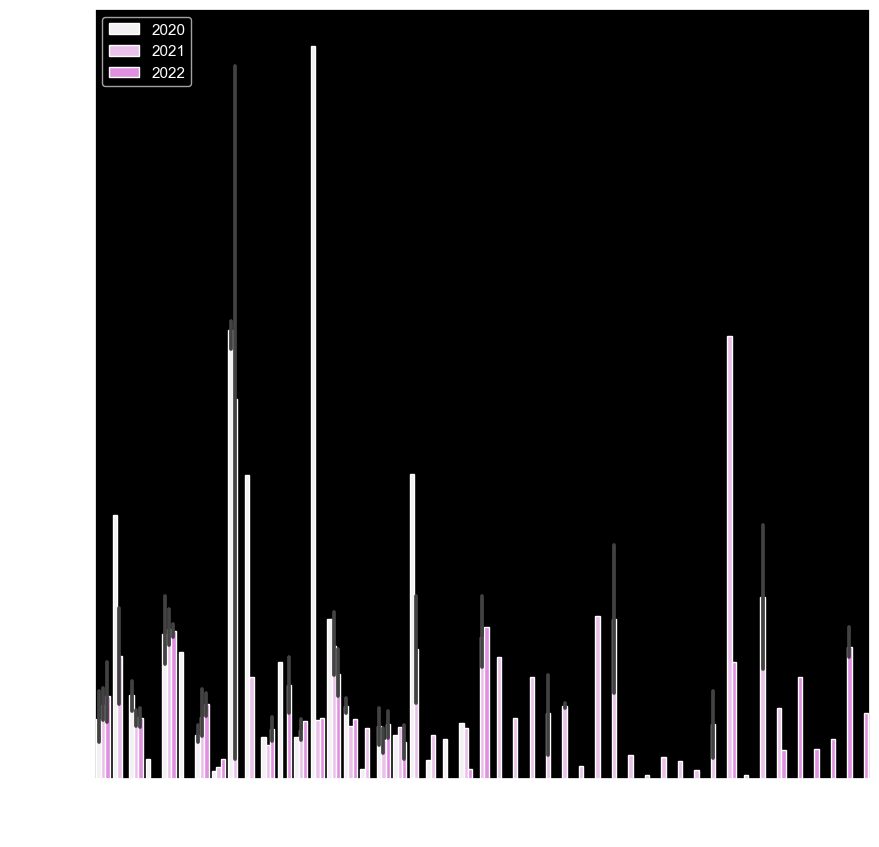

In [80]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
sns.barplot(data=df, x='company_location', y="salary",hue='work_year',color='violet')
plt.xticks(rotation=90)
plt.legend()
plt.show()

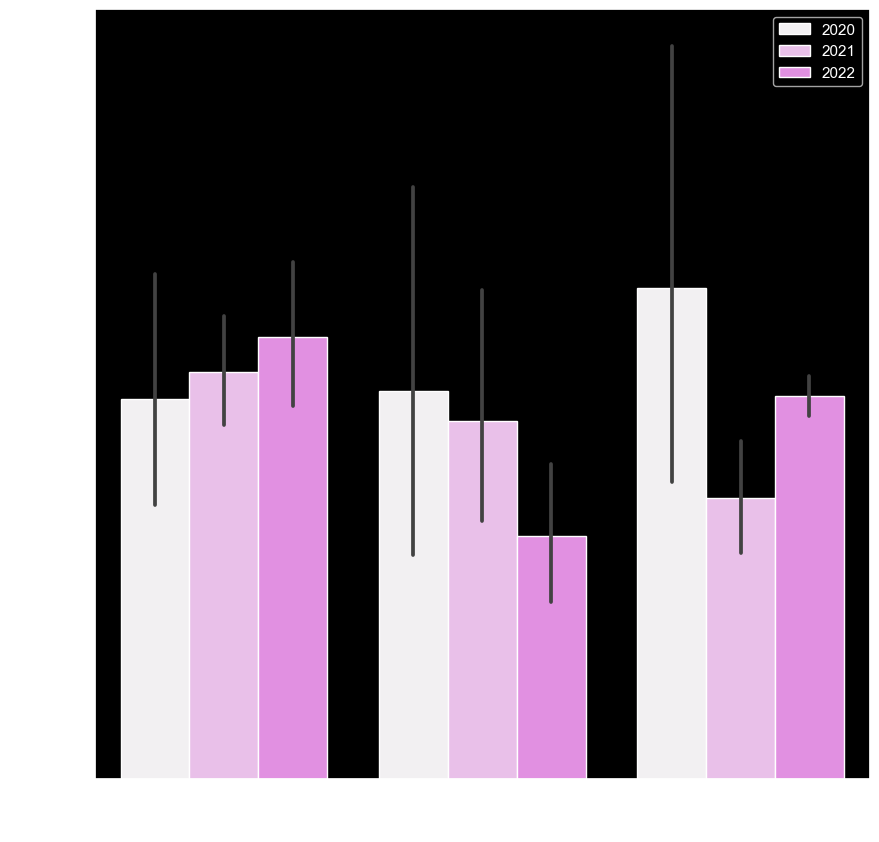

In [64]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
sns.barplot(data=df, x='company_size', y="salary",hue='work_year',color='violet')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [50]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [55]:
threshold = 1100000

df = df[df['salary'] <= threshold]

df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


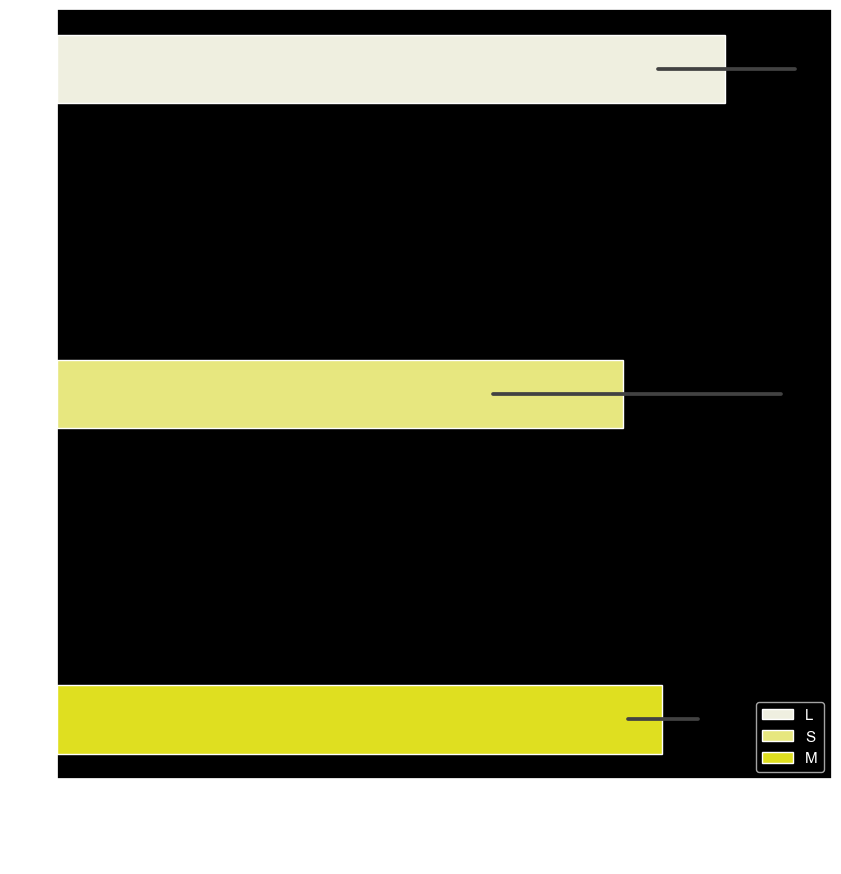

In [81]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
sns.barplot(data=df, x='salary', y='company_size',hue='company_size',color='yellow')
plt.xticks(rotation=90)
plt.legend()
plt.show()